# Train Code of Team Stay Safe

## Part 1: Read Image into dataset

### 1. Read into normal dataset (Version 1:train and test data is splited in folder)

In [1]:
# import torchvision
# import torch
# from torchvision import transforms

# # check if cuda is available for boost
# cuda = torch.cuda.is_available()

# # mean and std for normalization
# mean, std = 0.1307, 0.3081

# # path of the train and test data folder
# train_path = 'train'
# test_path = 'test'

# # read train dataset with transformation
# train_dataset = torchvision.datasets.ImageFolder(
#     root=train_path,
#     transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
#                                                                   transforms.Resize((28,28)),
#                                                                   transforms.ToTensor(),
#                                                                   transforms.Normalize((mean,), (std,))
#                                                                   ]))

# print(len(train_dataset))

# # read test data with transformation
# test_dataset = torchvision.datasets.ImageFolder(
#     root=test_path,
#     transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
#                                                                   transforms.Resize((28,28)),
#                                                                   transforms.ToTensor(),
#                                                                   transforms.Normalize((mean,), (std,))
#                                                                   ])
# )

# # Set up data loaders
# batch_size = 256
# kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

### 1. Read into normal dataset (Version 2: only one folder contain all dataset)

In [31]:
import torchvision
import torch
from torchvision import transforms

# check if cuda is available for boost
cuda = torch.cuda.is_available()

# mean and std for normalization
mean, std = 0.1307, 0.3081

# path of the fulldataset folder
folder_path = 'data'

# read train dataset with transformation
full_dataset = torchvision.datasets.ImageFolder(
    root=folder_path,
    transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                  transforms.Resize((28,28)),
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize((mean,), (std,))
                                                                  ]))

# train test split
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
train_dataset = torch.utils.data.Subset(full_dataset, range(train_size))
test_dataset = torch.utils.data.Subset(full_dataset, range(train_size, len(full_dataset)))

# Set up data loaders
batch_size = 256
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

### 2. Siamese model dataset

Create Siamese dataset generator class (Version 1:train and test data is splited in folder)

In [32]:
# import numpy as np
# import pandas as pd
# import random
# import torch
# import os
# from PIL import Image

# from torch.utils.data import Dataset
# from torch.utils.data.sampler import BatchSampler

# class Siamese_dataset(Dataset):

#     def __init__(self,imageFolderDataset,transform=None,should_invert=True):
#         self.imageFolderDataset = imageFolderDataset    
#         self.transform = transform
#         self.should_invert = should_invert
        
#     def __getitem__(self,index):
# #         img0_tuple = random.choice(self.imageFolderDataset.imgs)
#         img0_tuple = self.imageFolderDataset.imgs[index]
# #         new = self.imageFolderDataset.__getitem__(index)
#         #we need to make sure approx 50% of images are in the same class
#         should_get_same_class = random.randint(0,1) 
#         if should_get_same_class:
#             while True:
#                 #keep looping till the same class image is found
#                 img1_tuple = random.choice(self.imageFolderDataset.imgs) 
#                 if img0_tuple[1]==img1_tuple[1]:
#                     break
#         else:
#             while True:
#                 #keep looping till a different class image is found
                
#                 img1_tuple = random.choice(self.imageFolderDataset.imgs) 
#                 if img0_tuple[1] !=img1_tuple[1]:
#                     break

#         img0 = Image.open(img0_tuple[0])
#         img1 = Image.open(img1_tuple[0])
#         img0 = img0.convert("L")
#         img1 = img1.convert("L")
        
#         # if self.should_invert:
#         #     img0 = PIL.ImageOps.invert(img0)
#         #     img1 = PIL.ImageOps.invert(img1)

#         if self.transform is not None:
#             img0 = self.transform(img0)
#             img1 = self.transform(img1)
        
#         return (img0, img1) , should_get_same_class
#         # return (img0, img1) , from_numpy(np.array([int(img1_tuple[1]!=img0_tuple[1])],dtype=np.float32))
    
#     def __len__(self):
#         return len(self.imageFolderDataset.imgs)

Create Siamese dataset generator class (Version 2: only one folder contain all dataset)

In [33]:
import random
import torch
import os
from PIL import Image

from torch.utils.data import Dataset
from torch.utils.data.sampler import BatchSampler

class Siamese_dataset(Dataset):

    def __init__(self,imageFolderDataset,transform=None,should_invert=True):
        self.imageFolderDataset = imageFolderDataset    
        self.transform = transform
        self.should_invert = should_invert
        
    def __getitem__(self,index):
#         img0_tuple = random.choice(self.imageFolderDataset.imgs)
        img0_tuple = self.imageFolderDataset.dataset.imgs[index]
#         new = self.imageFolderDataset.__getitem__(index)
        #we need to make sure approx 50% of images are in the same class
        should_get_same_class = random.randint(0,1) 
        if should_get_same_class:
            while True:
                #keep looping till the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.dataset.imgs) 
                if img0_tuple[1]==img1_tuple[1]:
                    break
        else:
            while True:
                #keep looping till a different class image is found
                
                img1_tuple = random.choice(self.imageFolderDataset.dataset.imgs) 
                if img0_tuple[1] !=img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])
        img0 = img0.convert("L")
        img1 = img1.convert("L")
        
        # if self.should_invert:
        #     img0 = PIL.ImageOps.invert(img0)
        #     img1 = PIL.ImageOps.invert(img1)

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        
        return (img0, img1) , should_get_same_class
        # return (img0, img1) , from_numpy(np.array([int(img1_tuple[1]!=img0_tuple[1])],dtype=np.float32))
    
    def __len__(self):
        return len(self.imageFolderDataset.dataset.imgs)

Generate Siamese dataset

In [34]:
full_dataset_without_transform = torchvision.datasets.ImageFolder(root= folder_path)\
# train test split
# train_size = int(0.8 * len(full_dataset))
# test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
Siamese_train_dataset = Siamese_dataset(imageFolderDataset=train_dataset,
                                        transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                      transforms.Resize((28,28)),
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize((mean,), (std,))
                                                                      ])
                                       )

Siamese_test_dataset = Siamese_dataset(imageFolderDataset=test_dataset,
                                        transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                      transforms.Resize((28,28)),
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize((mean,), (std,))
                                                                      ])
                                       )

## Part 2: Network

### 2.1 Network Code

Embedding Network

In [35]:
import torch.nn as nn
import torch.nn.functional as F
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        self.convnet = nn.Sequential(nn.Conv2d(1, 32, 5), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2),
                                     nn.Conv2d(32, 64, 5), nn.PReLU(),
                                     nn.MaxPool2d(2, stride=2))

        self.fc = nn.Sequential(nn.Linear(64 * 4 * 4, 512),
                                nn.PReLU(),
#                                 nn.Linear(512, 512),
#                                 nn.PReLU(),
#                                 nn.Linear(512, 512)
                                )

    def forward(self, x):
        output = self.convnet(x)
        output = output.view(output.size()[0], -1)
        output = self.fc(output)
        return output

    def get_embedding(self, x):
        return self.forward(x)

Siamese Network

In [36]:
import torch.nn as nn
import torch.nn.functional as F
class SiameseNet(nn.Module):
    def __init__(self, embedding_net):
        super(SiameseNet, self).__init__()
        self.embedding_net = embedding_net

    def forward(self, x1, x2):
        output1 = self.embedding_net(x1)
        output2 = self.embedding_net(x2)
        return output1, output2

    def get_embedding(self, x):
        return self.embedding_net(x)

contrastive loss function

In [37]:
class ContrastiveLoss(nn.Module):
    """
    Contrastive loss
    Takes embeddings of two samples and a target label == 1 if samples are from the same class and label == 0 otherwise
    """

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.eps = 1e-9

    def forward(self, output1, output2, target, size_average=True):
        distances = (output2 - output1).pow(2).sum(1)  # squared distances
        losses = 0.5 * (target.float() * distances +
                        (1 + -1 * target).float() * F.relu(self.margin - (distances + self.eps).sqrt()).pow(2))
        return losses.mean() if size_average else losses.sum()

### 2.2 Create Network

In [38]:
import torch.optim as optim
from torch.optim import lr_scheduler

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
siamese_train_loader = torch.utils.data.DataLoader(Siamese_train_dataset, batch_size=batch_size, shuffle=False, **kwargs)
siamese_test_loader = torch.utils.data.DataLoader(Siamese_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

margin = 1.
embedding_net = EmbeddingNet()
model = SiameseNet(embedding_net)
if cuda:
    model.cuda()
loss_fn = ContrastiveLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 20
log_interval = 100

## Part 3: Train Network

### 3.1 Trainer class

In [39]:
import torch
import numpy as np


def fit(train_loader, val_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval, metrics=[],
        start_epoch=0):
    """
    Loaders, model, loss function and metrics should work together for a given task,
    i.e. The model should be able to process data output of loaders,
    loss function should process target output of loaders and outputs from the model

    Examples: Classification: batch loader, classification model, NLL loss, accuracy metric
    Siamese network: Siamese loader, siamese model, contrastive loss
    Online triplet learning: batch loader, embedding model, online triplet loss
    """
    for epoch in range(0, start_epoch):
        scheduler.step()

    for epoch in range(start_epoch, n_epochs):
        scheduler.step()

        # Train stage
        train_loss, metrics = train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval, metrics)

        message = 'Epoch: {}/{}. Train set: Average loss: {:.4f}'.format(epoch + 1, n_epochs, train_loss)
        for metric in metrics:
            message += '\t{}: {}'.format(metric.name(), metric.value())

        val_loss, metrics = test_epoch(val_loader, model, loss_fn, cuda, metrics)
        val_loss /= len(val_loader)

        message += '\nEpoch: {}/{}. Validation set: Average loss: {:.4f}'.format(epoch + 1, n_epochs,
                                                                                 val_loss)
        for metric in metrics:
            message += '\t{}: {}'.format(metric.name(), metric.value())

        print(message)


def train_epoch(train_loader, model, loss_fn, optimizer, cuda, log_interval, metrics):
    for metric in metrics:
        metric.reset()

    model.train()
    losses = []
    total_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        target = target if len(target) > 0 else None
        if not type(data) in (tuple, list):
            data = (data,)
        if cuda:
            data = tuple(d.cuda() for d in data)
            if target is not None:
                target = target.cuda()


        optimizer.zero_grad()
        outputs = model(*data)

        if type(outputs) not in (tuple, list):
            outputs = (outputs,)

        loss_inputs = outputs
        if target is not None:
            target = (target,)
            loss_inputs += target

        loss_outputs = loss_fn(*loss_inputs)
        loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
        losses.append(loss.item())
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        for metric in metrics:
            metric(outputs, target, loss_outputs)

        if batch_idx % log_interval == 0:
            message = 'Train: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                batch_idx * len(data[0]), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), np.mean(losses))
            for metric in metrics:
                message += '\t{}: {}'.format(metric.name(), metric.value())

            print(message)
            losses = []

    total_loss /= (batch_idx + 1)
    return total_loss, metrics


def test_epoch(val_loader, model, loss_fn, cuda, metrics):
    with torch.no_grad():
        for metric in metrics:
            metric.reset()
        model.eval()
        val_loss = 0
        for batch_idx, (data, target) in enumerate(val_loader):
            target = target if len(target) > 0 else None
            if not type(data) in (tuple, list):
                data = (data,)
            if cuda:
                data = tuple(d.cuda() for d in data)
                if target is not None:
                    target = target.cuda()

            outputs = model(*data)

            if type(outputs) not in (tuple, list):
                outputs = (outputs,)
            loss_inputs = outputs
            if target is not None:
                target = (target,)
                loss_inputs += target

            loss_outputs = loss_fn(*loss_inputs)
            loss = loss_outputs[0] if type(loss_outputs) in (tuple, list) else loss_outputs
            val_loss += loss.item()

            for metric in metrics:
                metric(outputs, target, loss_outputs)

    return val_loss, metrics

### 3.2 Train Network

In [40]:
fit(siamese_train_loader, siamese_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

/opt/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train: [0/837 (0%)]	Loss: 0.607852
Epoch: 1/20. Train set: Average loss: 0.2019
Epoch: 1/20. Validation set: Average loss: 0.1335
Train: [0/837 (0%)]	Loss: 0.154907
Epoch: 2/20. Train set: Average loss: 0.1348
Epoch: 2/20. Validation set: Average loss: 0.1473
Train: [0/837 (0%)]	Loss: 0.154218
Epoch: 3/20. Train set: Average loss: 0.1363
Epoch: 3/20. Validation set: Average loss: 0.1361
Train: [0/837 (0%)]	Loss: 0.134767
Epoch: 4/20. Train set: Average loss: 0.1309
Epoch: 4/20. Validation set: Average loss: 0.1307
Train: [0/837 (0%)]	Loss: 0.143075
Epoch: 5/20. Train set: Average loss: 0.1306
Epoch: 5/20. Validation set: Average loss: 0.1340
Train: [0/837 (0%)]	Loss: 0.140973
Epoch: 6/20. Train set: Average loss: 0.1333
Epoch: 6/20. Validation set: Average loss: 0.1325
Train: [0/837 (0%)]	Loss: 0.142608
Epoch: 7/20. Train set: Average loss: 0.1292
Epoch: 7/20. Validation set: Average loss: 0.1257
Train: [0/837 (0%)]	Loss: 0.131227
Epoch: 8/20. Train set: Average loss: 0.1284
Epoch: 8/2

### 3.3 Save Network parameters

In [41]:
torch.save(model.state_dict(), "contrastive_state.pth")

## Part 4: Extract Embedding

### 4.1 Extracter method

In [42]:
def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 512))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

### 4.2 Extract embedding and save to csv

In [43]:
import pandas as pd

train_embeddings_cl, train_labels_cl = extract_embeddings(train_loader, model)
train_embeddings_cl_df = pd.DataFrame(train_embeddings_cl)
train_embeddings_cl_df.to_csv("embedding_space.csv",index=False)

## Part 5: Save image path with index

In [46]:
image_list = train_dataset.dataset.imgs
image_list_df = pd.DataFrame(image_list)
image_list_df.to_csv("image_path.csv",index=False)

In [100]:
# new_image_path = '/Users/y/Desktop/program1/input_pic1.jpg'
# image_list =  image_list_df.values.tolist()
# train_embeddings_cl = train_embeddings_cl_df.values.tolist()

In [101]:
# mean, std = 0.1307, 0.3081
# transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
#                                                             transforms.Resize((28,28)),
#                                                             transforms.ToTensor(),
#                                                             transforms.Normalize((mean,), (std,))
#                                                             ])

In [102]:
# image = Image.open(new_image_path)
# image = transform(image)
# image.unsqueeze_(0)
# new_picture_embedding = model.get_embedding(image).data.cpu().numpy()



In [103]:
# distance = []
# I = []

# for i in train_embeddings_cl:
#     d = 0
#     for j in range(len(new_picture_embedding[0])):
#         ds = (new_picture_embedding[0][j] - i[j])**2
#         d = d + ds
#     distance.append(np.sqrt(d))

# for i in sorted(distance)[0:10]:
#     I.append(distance.index(i))

# path_list = []
# for i in I:
#     temp = image_list[i][0]
#     temp = temp.replace("\\", '/')
#     temp = 'program/' + temp
#     path_list.append(temp)

In [109]:
# sorted(distance)

[0.0010455213107844186,
 0.1529210979932431,
 0.15784061500886323,
 0.17608463457503207,
 0.18182240598670424,
 0.18779774516152473,
 0.19090906003321,
 0.19210930846769314,
 0.19348345361303002,
 0.19992386031530554,
 0.20687661306430896,
 0.2087463679470549,
 0.20953454672055596,
 0.2115722152314813,
 0.21403906688192018,
 0.21745019223237794,
 0.21933179077284878,
 0.2215041327132348,
 0.2221303672317718,
 0.22437077657318277,
 0.22764788794148277,
 0.2283027849747132,
 0.2284469833819523,
 0.23157876657157098,
 0.23198820874166146,
 0.2326311619703346,
 0.23396052436173653,
 0.234684430686586,
 0.23495659384716658,
 0.23508976470757728,
 0.23556195657950646,
 0.2366434792858302,
 0.23817856759401787,
 0.2401961549283388,
 0.240330689034193,
 0.24224992263015135,
 0.2446523371201526,
 0.24908177604496098,
 0.24951377236698566,
 0.2502954884925599,
 0.2506166766513732,
 0.2555178523180093,
 0.25677333267239344,
 0.2580483905048231,
 0.2595820196552415,
 0.26000160583385507,
 0.261396

In [104]:
# path_list

['program/data/005.Crested_Auklet/Crested_Auklet_0068_785253.jpg',
 'program/data/005.Crested_Auklet/Crested_Auklet_0011_794927.jpg',
 'program/data/006.Least_Auklet/Least_Auklet_0055_795106.jpg',
 'program/data/008.Rhinoceros_Auklet/Rhinoceros_Auklet_0020_2195.jpg',
 'program/data/002.Laysan_Albatross/Laysan_Albatross_0094_1013.jpg',
 'program/data/004.Groove_billed_Ani/Groove_Billed_Ani_0037_1560.jpg',
 'program/data/003.Sooty_Albatross/Sooty_Albatross_0076_796365.jpg',
 'program/data/009.Brewer_Blackbird/Brewer_Blackbird_0087_2622.jpg',
 'program/data/001.Black_footed_Albatross/Black_Footed_Albatross_0090_796077.jpg',
 'program/data/003.Sooty_Albatross/Sooty_Albatross_0074_1221.jpg']

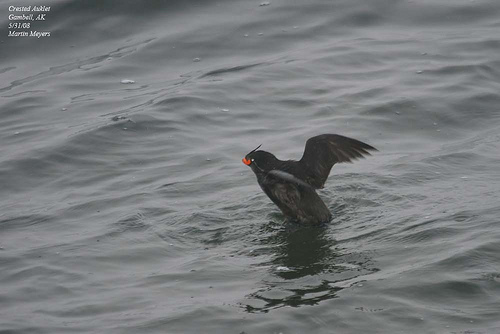

In [105]:
# from PIL import Image
# a = Image.open(new_image_path)
# a

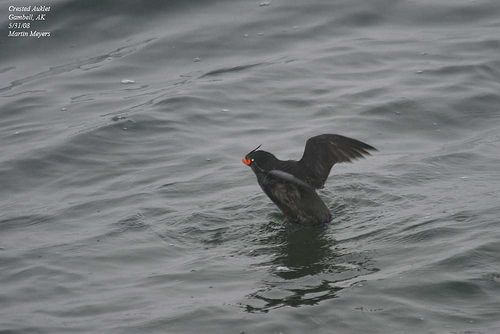

In [119]:
# b = Image.open('/Users/y/Documents/TeamStaySafe/web/static/'+path_list[0])
# b